# Task 1 - AI integration of Blocksheild Project
## EDA of the CIC-DIS-2017 DataSet 
### Nashat Alfarajat - BlockSheild AI development Team

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## CIC-IDS-2017

In [4]:
df = pd.read_csv(r"C:\Users\NSHAT\crossrealms - intern\datasets\CIC-IDS-2017\TrafficLabelling\CIC - IDS 2017 (2.6M).csv")

In [5]:
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


## size of Data set

In [6]:
df.shape

(2660377, 85)

### column data types 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660377 entries, 0 to 2660376
Data columns (total 85 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Flow ID                       object 
 1    Source IP                    object 
 2    Source Port                  int64  
 3    Destination IP               object 
 4    Destination Port             int64  
 5    Protocol                     int64  
 6    Timestamp                    object 
 7    Flow Duration                int64  
 8    Total Fwd Packets            int64  
 9    Total Backward Packets       int64  
 10  Total Length of Fwd Packets   float64
 11   Total Length of Bwd Packets  float64
 12   Fwd Packet Length Max        float64
 13   Fwd Packet Length Min        float64
 14   Fwd Packet Length Mean       float64
 15   Fwd Packet Length Std        float64
 16  Bwd Packet Length Max         float64
 17   Bwd Packet Length Min        float64
 18   Bwd Packet Length Mea

In [8]:
df.columns = df.columns.str.strip() # removing white spaces

# labels in the dataset

In [9]:
df["Label"].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration', 'FTP-Patator',
       'SSH-Patator', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk',
       'DoS GoldenEye', 'Heartbleed'], dtype=object)

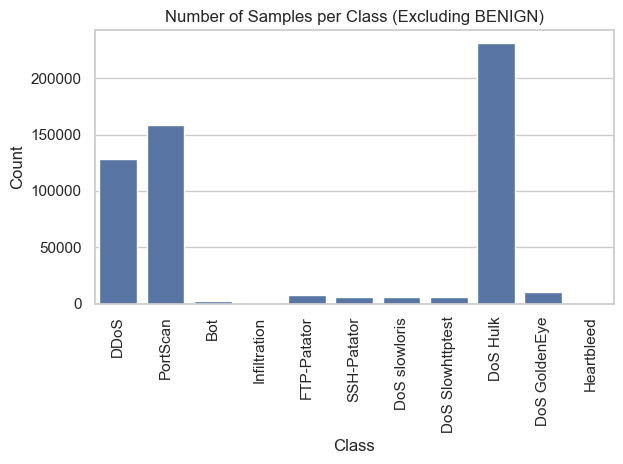

In [10]:
df_filtered = df[df['Label'] != 'BENIGN']
sns.set(style="whitegrid")
sns.countplot(data=df_filtered, x="Label")
plt.title("Number of Samples per Class (Excluding BENIGN)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.tight_layout()
plt.show()

In [11]:
df_filtered.shape # so 550K records of malicous flows

(555466, 85)

In [12]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d/%m/%Y %H:%M', errors='coerce') # converting Timestamp to date time dtype

## plotting and gaining insights

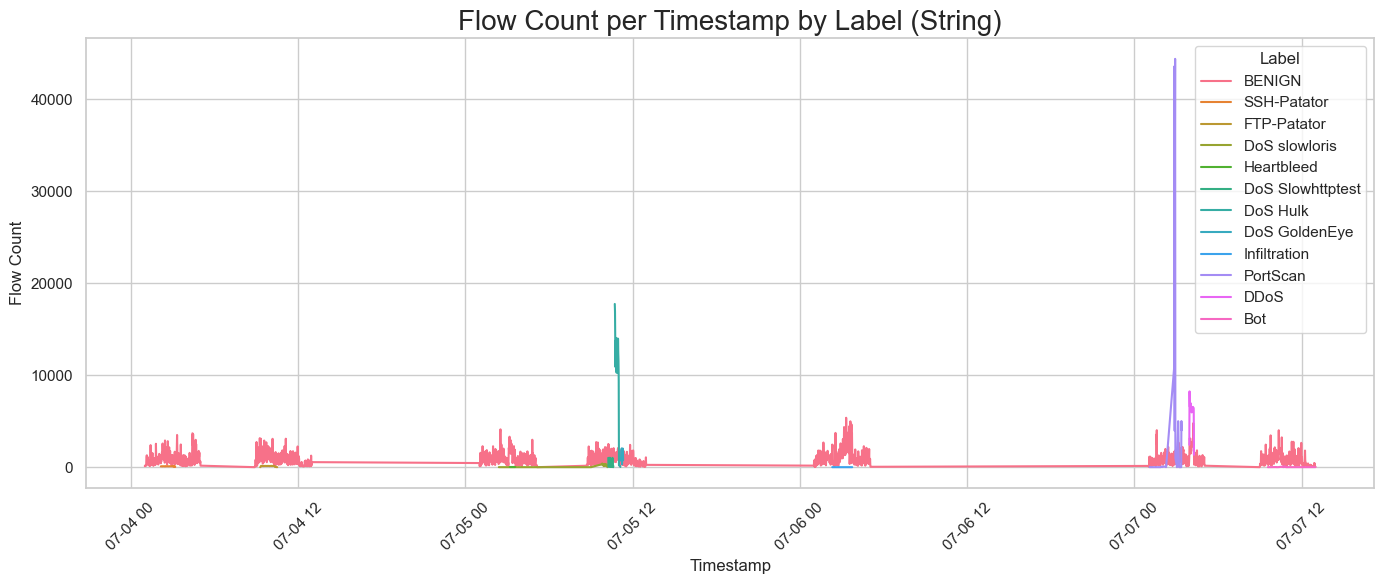

In [13]:
flow_counts = df.groupby(['Timestamp', 'Label']).size().reset_index(name='Count')

plt.figure(figsize=(14, 6))
sns.lineplot(data=flow_counts, x='Timestamp', y='Count', hue='Label')
plt.xticks(rotation=45)
plt.title("Flow Count per Timestamp by Label (String)",size=20)
plt.xlabel("Timestamp")
plt.ylabel("Flow Count")
plt.tight_layout()
plt.show()

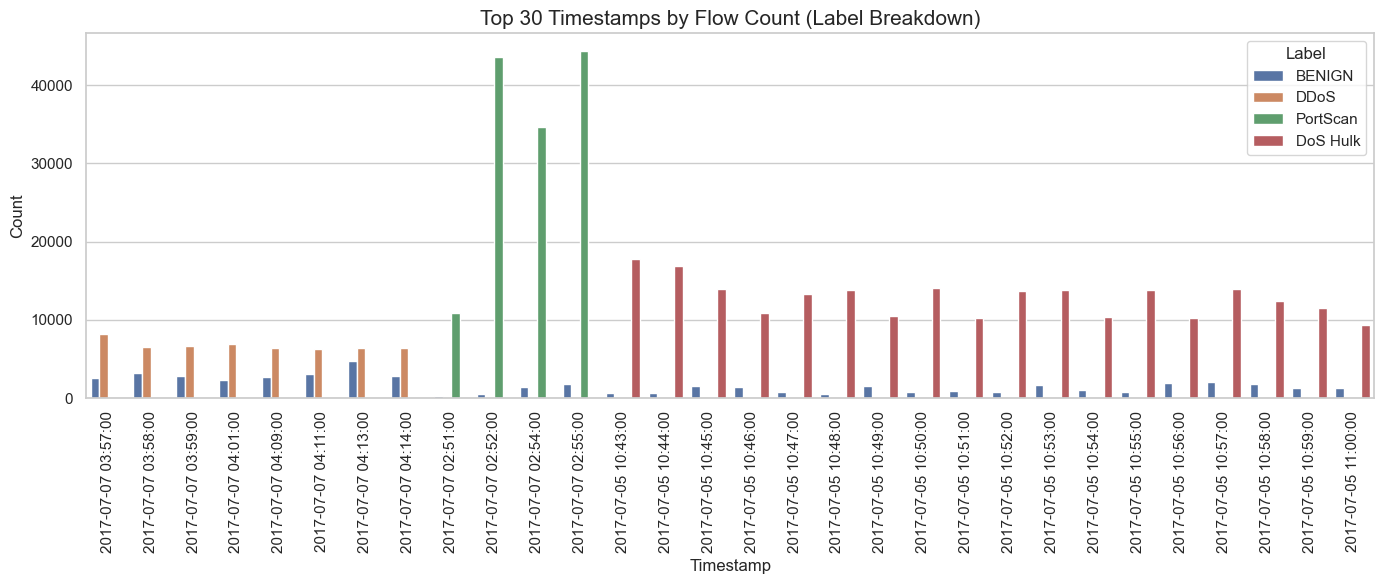

In [14]:
# Top 30 timestamps by flow volume
top_timestamps = df['Timestamp'].value_counts().nlargest(30).index
subset = df[df['Timestamp'].isin(top_timestamps)]

plt.figure(figsize=(14, 6))
sns.countplot(data=subset, x='Timestamp', hue='Label')
plt.xticks(rotation=90)
plt.title("Top 30 Timestamps by Flow Count (Label Breakdown)",size=15)
plt.xlabel("Timestamp")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


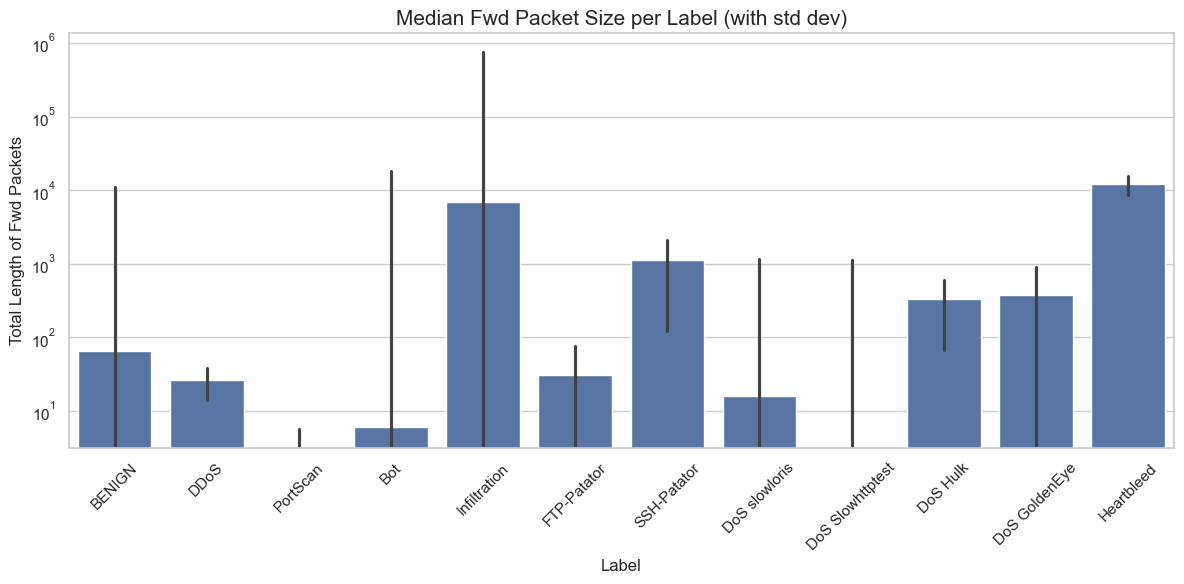

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Label', y='Total Length of Fwd Packets', estimator='median', errorbar='sd')
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Median Fwd Packet Size per Label (with std dev)",size=15)
plt.tight_layout()
plt.show()

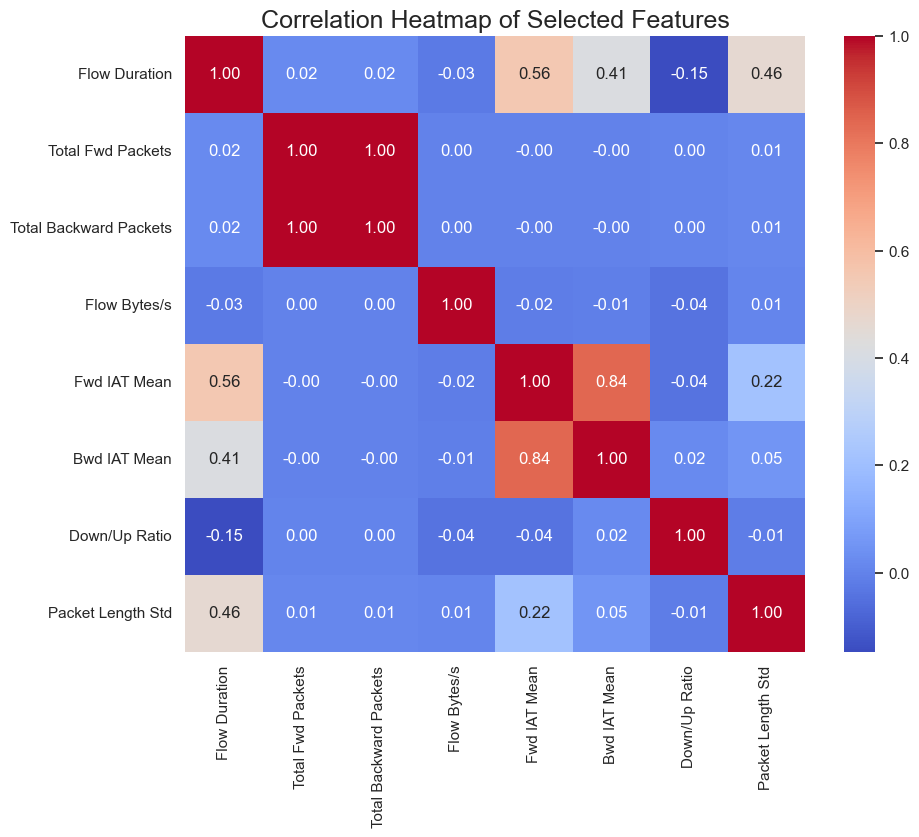

In [16]:
num_cols = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Flow Bytes/s',
            'Fwd IAT Mean', 'Bwd IAT Mean', 'Down/Up Ratio', 'Packet Length Std']

plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Features',size=18)
plt.show()


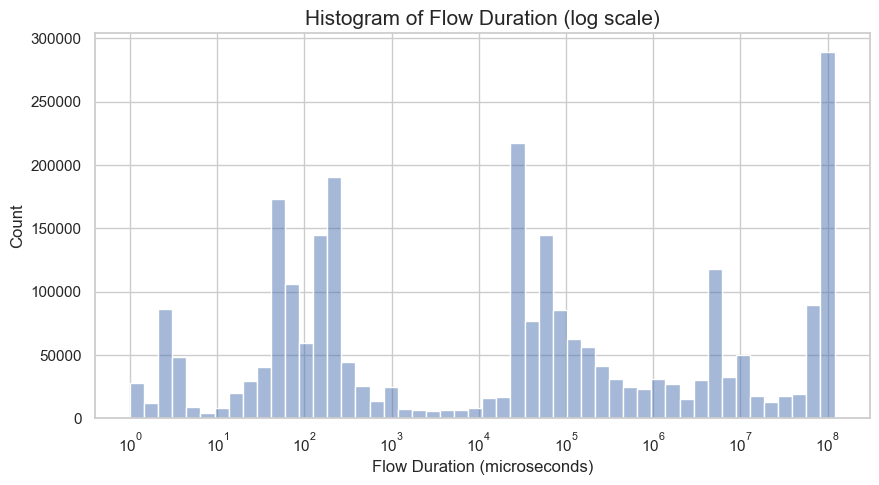

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(df['Flow Duration'], bins=50, log_scale=True,kde=True)
plt.title("Histogram of Flow Duration (log scale)",size=15)
plt.xlabel("Flow Duration (microseconds)")
plt.ylabel("Count")
plt.show()


## pre-processing

In [18]:
#dropping columns with only the same value (useless columns)
df = df.loc[:, df.nunique(dropna=False) > 1]

### outliers

In [19]:
columns_to_exclude = ['Timestamp', 'Protocol', 'Destination Port', 'Destination IP', 'Source Port', 'Source IP', 'Flow ID', 'Label']

columns_to_clean = df.drop(columns=columns_to_exclude, errors='ignore').columns
# drop unnecessary columns and compute quantiles
Q1 = df[columns_to_clean].quantile(0.25)
Q3 = df[columns_to_clean].quantile(0.75)
IQR = Q3 - Q1

In [20]:
# makes a Boolean DF: True if the value is an outlier (with in the AR [Q1-1.5IQR,Q3+1.5IQR])
outliers  = (df[columns_to_clean] < (Q1 - 1.5 * IQR)) | (df[columns_to_clean] > (Q3 + 1.5 * IQR))

# count outliers per column
outlier_counts = outliers.sum()
print(outlier_counts)

Flow Duration                  500440
Total Fwd Packets              307852
Total Backward Packets         284201
Total Length of Fwd Packets    409466
Total Length of Bwd Packets    588909
                                ...  
Active Min                     530989
Idle Mean                      539282
Idle Std                       211535
Idle Max                       539282
Idle Min                       539282
Length: 69, dtype: int64


In [21]:
# outliers in such datasets often be directly related to malicious activity, so we wont aggresivly deal with them 
#binning by median   
'''
num_bins = 10  
for col in columns_to_clean:
    try:
        # create equal-frequency bins
        bins, bin_edges = pd.qcut(df[col], q=num_bins, retbins=True, labels=False, duplicates='drop')

        # precompute medians per bin
        bin_medians = df.groupby(bins)[col].median()

        # map original values to bin medians
        df[col] = bins.map(bin_medians)
    except ValueError:
        # handle columns with too few unique values to bin
        continue
CANCELLED STEP
'''

"\nnum_bins = 10  \nfor col in columns_to_clean:\n    try:\n        # create equal-frequency bins\n        bins, bin_edges = pd.qcut(df[col], q=num_bins, retbins=True, labels=False, duplicates='drop')\n\n        # precompute medians per bin\n        bin_medians = df.groupby(bins)[col].median()\n\n        # map original values to bin medians\n        df[col] = bins.map(bin_medians)\n    except ValueError:\n        # handle columns with too few unique values to bin\n        continue\ncancelled        \n"

### Missing values

In [22]:
df.isnull().sum()[df.isnull().sum() > 0] # [...] to filter 
#checking if theres any missing values 

Timestamp       529918
Flow Bytes/s      1338
dtype: int64

In [23]:
df['Flow Bytes/s'] = df['Flow Bytes/s'].fillna(df['Flow Bytes/s'].median())
#filling by median

### Duplicates

In [24]:
df.duplicated().sum()

np.int64(974)

In [25]:
df= df.drop_duplicates()

Further steps such as scaling, feature selection, and feature engineering will be performed during the modeling phase.